# Most Favorable Area to Open a Restaurant in the UK

This project will consist of an exploration of the way venues are distributed in three of the biggest cities in the UK. This will act as a reference for anyone interested in starting a business. For the purpose of this project, the main focus will be regarding finding the best place to start a restaurant. An entrepreneur interested in such investement can make use of this project by, either, picking the location with the least amount of opened restaurants (to prevent fearse competition), or choosing to invest in the city with the most opened restaurants (which could be a sign that such investment is popular among residents).

The data used will consist of:  
* Postcodes dataframes of the three UK cities
* Coordinates dataframes
* Foursquare dataframe of the venues

The methodology of this project will be putting the venues into Clusters using KMeans

## Importing the Data

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
print('Libraries imported.')

Libraries imported.


In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

# scraping
# url = HIDDEN

html_doc = urlopen(url)

soup = BeautifulSoup(html_doc, 'lxml')

In [3]:
# get the data from the table and upload it to kanj_data
table = soup.find("table", class_="wikitable")

kanj_data = []
for items in table.find_all("tr")[:-1]:
    data = [' '.join(item.text.split()) for item in items.find_all(['th','td'])]
    
    kanj_data.append(data)

In [4]:
# naming columns
df = pd.DataFrame(kanj_data, columns=['postcode','city','remove1','remove2'])
del df['remove1']
del df['remove2']
df.drop(0, axis=0, inplace=True)
df

,postcode,city
1,AB,Aberdeen
2,AL,St Albans
3,B,Birmingham
4,BA,Bath
5,BB,Blackburn
6,BD,Bradford
7,BH,Bournemouth
8,BL,Bolton
9,BN,Brighton
10,BR,Bromley


Since London is divided into 4 areas, they will be all merged into one cell called london with a postcode 'LO'

In [5]:
df = df[~df['city'].str.contains('London')]
df.head()

,postcode,city
1,AB,Aberdeen
2,AL,St Albans
3,B,Birmingham
4,BA,Bath
5,BB,Blackburn


In [6]:
to_append = ['LO', 'London']

a_series = pd.Series(to_append, index = df.columns)

df = df.append(a_series, ignore_index=True)
df.head()

,postcode,city
0,AB,Aberdeen
1,AL,St Albans
2,B,Birmingham
3,BA,Bath
4,BB,Blackburn


In [7]:
df = df.reset_index(drop=True).sort_values(by=['postcode', 'city'])
df.head()

,postcode,city
0,AB,Aberdeen
1,AL,St Albans
2,B,Birmingham
3,BA,Bath
4,BB,Blackburn


In [8]:
df.shape

(113, 2)

In [51]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

#def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_00cca11763fc4b7098910ce5826bc687 = ibm_boto3.client(service_name='s3',
    #ibm_api_key_id= HIDDEN
    #ibm_auth_endpoint= HIDDEN
    config=Config(signature_version='oauth'),
    #endpoint_url= HIDDEN

#body = client_00cca11763fc4b7098910ce5826bc687.get_object(Bucket='capstoneprojectkanj-donotdelete-pr-3y1n0xqzr54t9q',Key='gb.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
#if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

#df_data_1 = pd.read_csv(body)
#df_data_1.head()


SyntaxError: unexpected EOF while parsing (<ipython-input-51-93a7603034a6>, line 22)

As it is noted in df_data_1, the three biggest cities in the UK are:
  * London
  * Birmingham
  * Manchester  
  
Hence, the project will focus on those three locations

## df_data_1 Cleaning

In [10]:
del df_data_1['country']
del df_data_1['iso2']
del df_data_1['admin']
del df_data_1['capital']
del df_data_1['population']
del df_data_1['population_proper']
df_data_1.head()

,city,lat,lng
0,London,51.514248,-0.093145
1,Birmingham,52.466667,-1.916667
2,Manchester,53.500000,-2.216667
3,Leeds,53.800000,-1.583333
4,Sheffield,53.366667,-1.500000


In [11]:
df_clean = pd.merge(df_data_1, df, on='city', how='right')


In [12]:
df_clean = df_clean.dropna()
df_clean.head()

,city,lat,lng,postcode
0,London,51.514248,-0.093145,LO
1,Birmingham,52.466667,-1.916667,B
2,Manchester,53.500000,-2.216667,M
3,Leeds,53.800000,-1.583333,LS
4,Sheffield,53.366667,-1.500000,S


In [13]:
df_clean.drop_duplicates(subset ="city", 
                     keep = False, inplace = True)


In [14]:
cols=['postcode', 'city', 'lat','lng']
df_clean=df_clean[cols]
df_clean.head()

,postcode,city,lat,lng
0,LO,London,51.514248,-0.093145
1,B,Birmingham,52.466667,-1.916667
2,M,Manchester,53.500000,-2.216667
3,LS,Leeds,53.800000,-1.583333
4,S,Sheffield,53.366667,-1.500000


In [16]:
# Due to the size of the original dataset, only the first 9 biggest cities will be taken into consideration 
df_clean=df_clean.iloc[:9]
df_clean

,postcode,city,lat,lng
0,LO,London,51.514248,-0.093145
1,B,Birmingham,52.466667,-1.916667
2,M,Manchester,53.500000,-2.216667
3,LS,Leeds,53.800000,-1.583333
4,S,Sheffield,53.366667,-1.500000
5,G,Glasgow,55.833333,-4.250000
6,NG,Nottingham,52.966667,-1.166667
7,L,Liverpool,53.416667,-3.000000
8,SS,Southend-on-Sea,51.533333,0.700000


In [17]:
!conda install -c conda-forge folium=0.5.0 --yes 
!conda install -c conda-forge geopy --yes
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
import requests
import json
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [18]:
address = 'United Kingdom'
geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The coordinates of Spain are {}, {}.'.format(latitude, longitude))

The coordinates of Spain are 54.7023545, -3.2765753.


In [19]:
map_UK = folium.Map(location=[latitude, longitude], zoom_start=6)
for lat, lng, postalcode, city in zip(df_clean['lat'], df_clean['lng'], df_clean['postcode'], df_clean['city']):
    label = ' {}; {}'.format(postalcode, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_UK)  
    
map_UK

## Foursquare

In [52]:
# HIDDEN CREDENTIALS
#CLIENT_ID 
#CLIENT_SECRET 
#VERSION
#radius
#Limit 

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=100000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            Limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
nearby_venues = getNearbyVenues(names=df_clean['city'],
                                   latitudes=df_clean['lat'],
                                   longitudes=df_clean['lng']
                                  )

London
Birmingham
Manchester
Leeds
Sheffield
Glasgow
Nottingham
Liverpool
Southend-on-Sea


In [24]:
print(nearby_venues.shape)
nearby_venues.head()

(900, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,London,51.514248,-0.093145,The Ned Hotel,51.513755,-0.090067,Hotel
1,London,51.514248,-0.093145,The Merchant House,51.513264,-0.093039,Cocktail Bar
2,London,51.514248,-0.093145,M&S Simply Food,51.505517,-0.098047,Grocery Store
3,London,51.514248,-0.093145,Rosslyn,51.512527,-0.093327,Coffee Shop
4,London,51.514248,-0.093145,Borough Market,51.505495,-0.090518,Farmers Market


To remove special letters like '' and to transform all characters into lower case

In [25]:
nearby_venues['Venue Category'] = nearby_venues['Venue Category'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
nearby_venues['Venue Category'] = nearby_venues['Venue Category'].apply(str.lower)

In [26]:
generallist = ' pub club cafe food mall restaurant zoo store club beach shopping stadium landmark center shop market castle art bar theater garden hall gym hotel museum'.split()

def general_category(list):
    for item in list:
        nearby_venues.loc[nearby_venues["Venue Category"].str.contains(item), 'General Category'] = item



In [27]:
general_category(generallist)
nearby_venues.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,General Category
0,London,51.514248,-0.093145,The Ned Hotel,51.513755,-0.090067,hotel,hotel
1,London,51.514248,-0.093145,The Merchant House,51.513264,-0.093039,cocktail bar,bar
2,London,51.514248,-0.093145,M&S Simply Food,51.505517,-0.098047,grocery store,store
3,London,51.514248,-0.093145,Rosslyn,51.512527,-0.093327,coffee shop,shop
4,London,51.514248,-0.093145,Borough Market,51.505495,-0.090518,farmers market,market


Since there are a lot of NaN values in General Category, their values from Venue Category will be copied.

In [28]:
nearby_venues['General Category'].fillna(nearby_venues["Venue Category"], inplace=True)
nearby_venues.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,General Category
0,London,51.514248,-0.093145,The Ned Hotel,51.513755,-0.090067,hotel,hotel
1,London,51.514248,-0.093145,The Merchant House,51.513264,-0.093039,cocktail bar,bar
2,London,51.514248,-0.093145,M&S Simply Food,51.505517,-0.098047,grocery store,store
3,London,51.514248,-0.093145,Rosslyn,51.512527,-0.093327,coffee shop,shop
4,London,51.514248,-0.093145,Borough Market,51.505495,-0.090518,farmers market,market


In [29]:
nearby_venues.drop('Venue Category', axis=1, inplace=True)
nearby_venues.rename(columns={"General Category": "Venues"}, inplace=True)
nearby_venues.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venues
0,London,51.514248,-0.093145,The Ned Hotel,51.513755,-0.090067,hotel
1,London,51.514248,-0.093145,The Merchant House,51.513264,-0.093039,bar
2,London,51.514248,-0.093145,M&S Simply Food,51.505517,-0.098047,store
3,London,51.514248,-0.093145,Rosslyn,51.512527,-0.093327,shop
4,London,51.514248,-0.093145,Borough Market,51.505495,-0.090518,market


In [30]:
# one hot encoding
UK_onehot = pd.get_dummies(nearby_venues[['Venues']], prefix="", prefix_sep="")

# add city column back to dataframe
UK_onehot['City'] = nearby_venues['City'] 

# move city column to the first column
fixed_columns = [UK_onehot.columns[-1]] + list(UK_onehot.columns[:-1])
UK_onehot = UK_onehot[fixed_columns]

UK_onehot.head()

,City,art,athletics & sports,bakery,bar,bbq joint,beach,bistro,boutique,breakfast spot,brewery,burger joint,burrito place,cafe,canal,castle,church,club,creperie,deli / bodega,diner,distillery,event space,farm,food,forest,garden,gym,hall,harbor / marina,historic site,hotel,landmark,lounge,market,mini golf,mountain,multiplex,museum,music venue,nail salon,national park,nature preserve,noodle house,opera house,other great outdoors,outdoor sculpture,park,pedestrian plaza,pizza place,plaza,pool,pub,racetrack,reservoir,resort,restaurant,sandwich place,scenic lookout,shop,spa,stadium,steakhouse,store,tea room,theater,theme park,trail,waterfront,zoo
0,London,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,London,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,London,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,London,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,London,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
UK_grouped = UK_onehot.groupby('City').mean().reset_index()

print('shape:',UK_grouped.shape)
UK_grouped.head()

shape: (9, 70)


,City,art,athletics & sports,bakery,bar,bbq joint,beach,bistro,boutique,breakfast spot,brewery,burger joint,burrito place,cafe,canal,castle,church,club,creperie,deli / bodega,diner,distillery,event space,farm,food,forest,garden,gym,hall,harbor / marina,historic site,hotel,landmark,lounge,market,mini golf,mountain,multiplex,museum,music venue,nail salon,national park,nature preserve,noodle house,opera house,other great outdoors,outdoor sculpture,park,pedestrian plaza,pizza place,plaza,pool,pub,racetrack,reservoir,resort,restaurant,sandwich place,scenic lookout,shop,spa,stadium,steakhouse,store,tea room,theater,theme park,trail,waterfront,zoo
0,Birmingham,0.03,0.00,0.00,0.05,0.01,0.00,0.01,0.00,0.01,0.02,0.01,0.00,0.01,0.00,0.00,0.01,0.00,0.0,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.03,0.00,0.00,0.00,0.01,0.00,0.00,0.04,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.08,0.00,0.02,0.00,0.00,0.24,0.01,0.00,0.00,0.13,0.01,0.00,0.11,0.00,0.00,0.00,0.00,0.00,0.06,0.0,0.03,0.00,0.01
1,Glasgow,0.01,0.02,0.00,0.14,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.00,0.03,0.00,0.03,0.00,0.00,0.0,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.02,0.01,0.01,0.00,0.01,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.0,0.01,0.0,0.01,0.00,0.00,0.01,0.06,0.00,0.02,0.01,0.01,0.06,0.00,0.00,0.01,0.16,0.00,0.00,0.10,0.00,0.02,0.03,0.04,0.01,0.02,0.0,0.00,0.00,0.00
2,Leeds,0.01,0.00,0.02,0.14,0.00,0.00,0.00,0.00,0.01,0.04,0.00,0.01,0.04,0.00,0.01,0.01,0.00,0.0,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.02,0.01,0.00,0.00,0.05,0.03,0.00,0.00,0.01,0.00,0.01,0.01,0.02,0.01,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.07,0.00,0.02,0.00,0.00,0.10,0.00,0.01,0.00,0.06,0.00,0.01,0.17,0.00,0.00,0.00,0.03,0.01,0.03,0.0,0.01,0.00,0.00
3,Liverpool,0.01,0.00,0.00,0.07,0.01,0.02,0.00,0.00,0.00,0.00,0.02,0.00,0.07,0.00,0.00,0.02,0.01,0.0,0.00,0.01,0.00,0.00,0.00,0.02,0.01,0.01,0.01,0.00,0.00,0.01,0.03,0.00,0.00,0.03,0.00,0.00,0.00,0.03,0.00,0.0,0.00,0.0,0.00,0.00,0.01,0.01,0.11,0.00,0.02,0.00,0.00,0.08,0.01,0.00,0.00,0.10,0.02,0.01,0.14,0.00,0.02,0.00,0.00,0.00,0.03,0.0,0.01,0.01,0.03
4,London,0.08,0.00,0.02,0.08,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.02,0.01,0.00,0.01,0.0,0.00,0.00,0.00,0.01,0.00,0.03,0.00,0.02,0.02,0.00,0.00,0.00,0.09,0.01,0.02,0.02,0.00,0.00,0.01,0.05,0.02,0.0,0.00,0.0,0.00,0.01,0.00,0.00,0.05,0.02,0.01,0.02,0.00,0.02,0.00,0.00,0.00,0.06,0.00,0.02,0.07,0.01,0.00,0.02,0.08,0.00,0.06,0.0,0.00,0.00,0.00


#### Let's print each City along with the top 10 most common venues

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [33]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
City_venues_sorted = pd.DataFrame(columns=columns)
City_venues_sorted['City'] = UK_grouped['City']

for ind in np.arange(UK_grouped.shape[0]):
    City_venues_sorted.iloc[ind, 1:] = return_most_common_venues(UK_grouped.iloc[ind, :], num_top_venues)

City_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Birmingham,pub,restaurant,shop,park,theater
1,Glasgow,restaurant,bar,shop,park,pub
2,Leeds,shop,bar,pub,park,restaurant
3,Liverpool,shop,park,restaurant,pub,bar
4,London,hotel,art,bar,store,shop


In [34]:
# set number of clusters
kclusters = 5

UK_grouped_clustering = UK_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(UK_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 2, 4, 0, 1, 0, 0, 4, 1], dtype=int32)

In [38]:
# add clustering labels
City_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

UK_merged = df_clean

# merge toronto_grouped with toronto_data to add latitude/longitude for each city
UK_merged = UK_merged.join(City_venues_sorted.set_index('City'), on='city')

UK_merged.head() # check the last columns!

,postcode,city,lat,lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,LO,London,51.514248,-0.093145,1,hotel,art,bar,store,shop
1,B,Birmingham,52.466667,-1.916667,3,pub,restaurant,shop,park,theater
2,M,Manchester,53.500000,-2.216667,0,shop,restaurant,bar,pub,park
3,LS,Leeds,53.800000,-1.583333,4,shop,bar,pub,park,restaurant
4,S,Sheffield,53.366667,-1.500000,4,shop,bar,pub,park,theater


In [39]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(UK_merged['lat'], UK_merged['lng'], UK_merged['city'], UK_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Examine Clusters

#### Cluster 1

In [40]:
UK_merged.loc[UK_merged['Cluster Labels'] == 0, UK_merged.columns[[1] + list(range(5, UK_merged.shape[1]))]]

,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Manchester,shop,restaurant,bar,pub,park
6,Nottingham,park,shop,pub,restaurant,bar
7,Liverpool,shop,park,restaurant,pub,bar


#### Cluster 2

In [41]:
UK_merged.loc[UK_merged['Cluster Labels'] == 1, UK_merged.columns[[1] + list(range(5, UK_merged.shape[1]))]]

,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,London,hotel,art,bar,store,shop
8,Southend-on-Sea,bar,hotel,theater,shop,park


#### Cluster 3

In [42]:
UK_merged.loc[UK_merged['Cluster Labels'] == 2, UK_merged.columns[[1] + list(range(5, UK_merged.shape[1]))]]

,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
5,Glasgow,restaurant,bar,shop,park,pub


#### Cluster 4

In [43]:
UK_merged.loc[UK_merged['Cluster Labels'] == 3, UK_merged.columns[[1] + list(range(5, UK_merged.shape[1]))]]

,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Birmingham,pub,restaurant,shop,park,theater


#### The 5 clusters show that the three big cities in the UK are quite different since they did not meet in any cluster. In addition, a restaurant is not apparent to be the most common venue to any of the three big cities. Thus, a better representation will be provided to ease the understanding of the data.

# Exploratory Analysis

In [45]:
Exp_UK = UK_onehot.groupby('City').sum()
big_cities = Exp_UK.loc[['London', 'Manchester', 'Birmingham']]
big_cities1=big_cities.loc[:, (big_cities != 0).any(axis=0)] # removes columns where all the features are zeros
big_cities1


,art,bakery,bar,bbq joint,bistro,boutique,breakfast spot,brewery,burger joint,burrito place,cafe,canal,castle,church,club,deli / bodega,event space,food,forest,garden,gym,hall,harbor / marina,historic site,hotel,landmark,lounge,market,mini golf,mountain,multiplex,museum,music venue,national park,opera house,park,pedestrian plaza,pizza place,plaza,pub,racetrack,reservoir,restaurant,sandwich place,scenic lookout,shop,spa,stadium,steakhouse,store,tea room,theater,trail,zoo
City,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
London,8,2,8,0,0,1,0,1,0,0,1,2,1,0,1,0,1,3,0,2,2,0,0,0,9,1,2,2,0,0,1,5,2,0,1,5,2,1,2,2,0,0,6,0,2,7,1,0,2,8,0,6,0,0
Manchester,4,1,10,0,0,0,0,2,1,1,3,0,0,0,0,1,1,1,1,3,0,1,0,2,0,0,0,2,0,1,1,3,0,1,0,8,0,1,0,10,1,1,13,1,1,16,0,1,1,1,1,3,0,1
Birmingham,3,0,5,1,1,0,1,2,1,0,1,0,0,1,0,1,0,1,0,0,1,1,1,1,3,0,0,0,1,0,0,4,0,0,0,8,0,2,0,24,1,0,13,1,0,11,0,0,0,0,0,6,3,1


Deleting columns with zeros in all their features.

## LONDON

In [46]:
LONDON = big_cities1.loc[['London']]

LONDON = LONDON.sort_values(by=LONDON.index[0], axis=1, ascending=False)
LONDON=LONDON.loc[:, (LONDON != 0).any(axis=0)]
LONDON



,hotel,store,art,bar,shop,theater,restaurant,park,museum,food,steakhouse,scenic lookout,gym,plaza,pedestrian plaza,music venue,bakery,lounge,pub,market,garden,canal,multiplex,boutique,spa,brewery,cafe,castle,opera house,club,pizza place,event space,landmark
City,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
London,9,8,8,8,7,6,6,5,5,3,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1


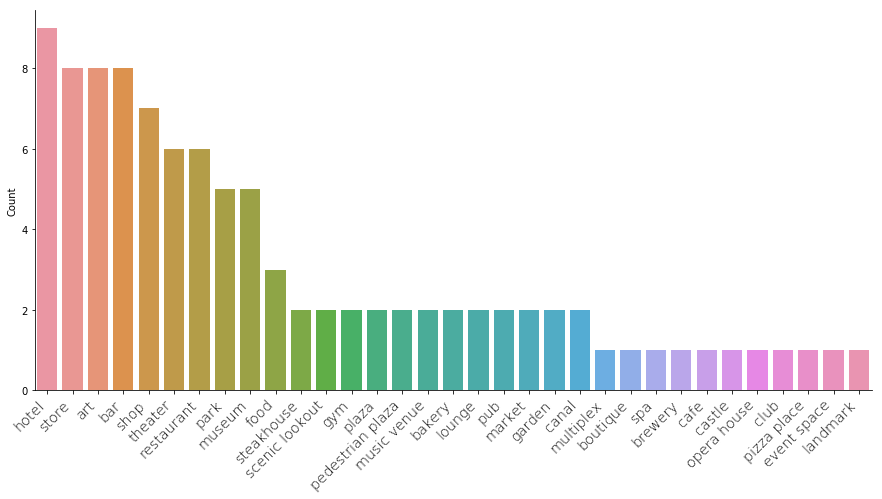

In [47]:
plt.figure(figsize=(15,7))
sns.barplot(x=LONDON.columns, y=LONDON.values[0])
sns.despine()
plt.ylabel('Count')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')

plt.show()



# MANCHESTER

In [48]:
MAN = big_cities1.loc[['Manchester']]

MAN = MAN.sort_values(by=MAN.index[0], axis=1, ascending=False)
MAN=MAN.loc[:, (MAN != 0).any(axis=0)]
MAN

,shop,restaurant,bar,pub,park,art,garden,theater,museum,cafe,historic site,market,brewery,national park,bakery,tea room,store,steakhouse,stadium,scenic lookout,sandwich place,reservoir,racetrack,pizza place,burger joint,multiplex,mountain,zoo,deli / bodega,event space,burrito place,food,forest,hall
City,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Manchester,16,13,10,10,8,4,3,3,3,3,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


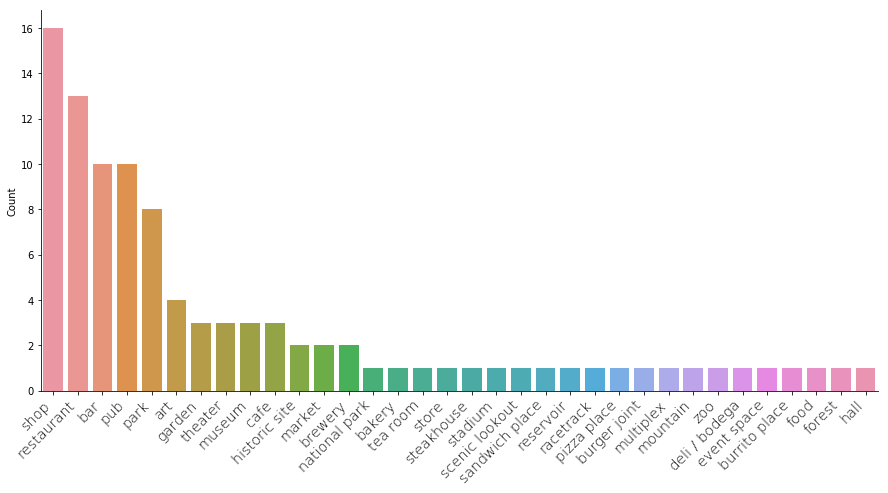

In [49]:
plt.figure(figsize=(15,7))
sns.barplot(x=MAN.columns, y=MAN.values[0])
sns.despine()
plt.ylabel('Count')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')

plt.show()